In [1152]:
from scipy import stats
from scipy.stats import skew,norm  # for some statistics
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
import scipy.stats as stats


#Visualizing tools
import seaborn as sns
import matplotlib.pyplot as plt


#preprocessing tools
import pandas as pd
import numpy as np


from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder


#ML Algoirthm
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
import sklearn.linear_model as linear_model
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

In [1153]:
import warnings
warnings.filterwarnings("ignore")

In [1154]:
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
import sklearn.linear_model as linear_model
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

In [1155]:
import lightgbm as lgb
import warnings

from scipy.stats import sem
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

from catboost import CatBoostRegressor

In [1156]:
ttrain = pd.read_csv('Train.csv')
ttest = pd.read_csv('Test.csv')

In [1157]:
#for i in range(len(ttrain['close'])):
    #if np.isnan(ttrain['close'][i]):
        #ttrain.drop([i], axis=0, inplace = True)

In [1158]:
fin_data = pd.concat([ttrain,ttest]).reset_index(drop=True)
fin_data.drop(["id","asset_id"], axis=1, inplace = True)

In [1159]:
fin_data.head()

,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,reddit_posts_score,reddit_comments,...,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global,close
0,9422.849081,9428.490628,9422.849081,7.131986e+08,1.737635e+11,1689.0,817.0,55.0,105.0,61.0,...,606.0,2.0,1.0,1.0,2.0,5.0,4422,1.434516,2.818066e+11,9428.279323
1,7985.359278,7992.059917,7967.567267,4.004755e+08,1.426942e+11,920.0,544.0,20.0,531.0,103.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2159,-2.459507,2.126897e+11,7967.567267
2,49202.033778,49394.593518,49068.057046,3.017729e+09,9.166977e+11,1446.0,975.0,72.0,1152.0,187.0,...,692.0,3.0,1.0,1.0,NaN,NaN,10602,4.942448,1.530712e+12,49120.738484
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,424.0,268.0,...,NaN,NaN,NaN,NaN,NaN,NaN,285,NaN,NaN,NaN
4,10535.737119,10535.737119,10384.798216,1.150053e+09,1.921183e+11,1012.0,638.0,24.0,42.0,50.0,...,749.0,2.0,1.0,1.0,NaN,2.0,3996,2.609576,3.386925e+11,10384.798216


In [1160]:
fin_data_na = (fin_data.isnull().sum() / len(fin_data)) * 100
fin_data_na = fin_data_na.drop(fin_data_na[fin_data_na == 0].index).sort_values(ascending=False)[:25]
missing_data = pd.DataFrame({'Missing Ratio' :fin_data_na})
missing_data.head(20)

,Missing Ratio
medium,76.657473
youtube,62.220219
close,54.296171
social_score_24h_rank,35.446059
social_volume_24h_rank,35.446059
volume_24h_rank,35.446059
percent_change_24h_rank,35.446059
percent_change_24h,33.892012
market_cap_rank,33.796542
market_cap_global,33.536650


## Dealing With Missing Values

In [1161]:
#fin_data = fin_data.fillna(0)

In [1162]:
## drop the medium feature. It has too many missing values
fin_data.drop(['medium'],axis =1, inplace= True)

In [1163]:
fin_data.isnull().sum()

open                        5933
high                        5933
low                         5933
volume                      5947
market_cap                  6284
url_shares                  5994
unique_url_shares           5994
reddit_posts                 341
reddit_posts_score           341
reddit_comments              343
reddit_comments_score        343
tweets                      5981
tweet_spam                  5981
tweet_followers             5993
tweet_quotes                5993
tweet_retweets              5993
tweet_replies               5993
tweet_favorites             5993
tweet_sentiment1            5981
tweet_sentiment2            5981
tweet_sentiment3            5981
tweet_sentiment4            5981
tweet_sentiment5            5981
tweet_sentiment_impact1     5981
tweet_sentiment_impact2     5981
tweet_sentiment_impact3     5981
tweet_sentiment_impact4     5981
tweet_sentiment_impact5     5981
social_score                5981
average_sentiment           5981
news      

In [1164]:
"""Most of the missing values are concentrated in the test set, so we fill open, high, and low with the mean of the training set
"""

'Most of the missing values are concentrated in the test set, so we fill open, high, and low with the mean of the training set\n'

In [1165]:
def ffillna(col):
    for i in col:
        fin_data[i].fillna(0,inplace = True)

In [1166]:
col = ['percent_change_24h','social_score_24h_rank','social_volume_24h_rank',
         'volume_24h_rank','percent_change_24h_rank','close']
ffillna(col)

In [1167]:
def fill(col):
    for i in col:
        fin_data[i].ffill(inplace = True)

In [1168]:
col = ['volume','unique_url_shares','reddit_posts','tweets','news','youtube',
         'tweet_spam','tweet_followers','tweet_quotes','tweet_retweets','tweet_replies','tweet_favorites',
         'tweet_sentiment1','tweet_sentiment2','tweet_sentiment3','tweet_sentiment4','tweet_sentiment5',
         'social_volume']
fill(col)

In [1169]:
def mfill(col):
    for i in col:
        fin_data[i].fillna(0, inplace = True)

In [1170]:
f_col = ['open','high','low','market_cap_rank','market_cap_global','social_volume_24h_rank','market_cap','url_shares',
         'reddit_comments','reddit_posts_score','reddit_comments_score','volume_24h_rank','percent_change_24h_rank']
mfill(f_col)

In [1171]:
def medfill(col):
    for i in col:
        fin_data[i].fillna(0, inplace = True)

In [1172]:
med_col = ['tweet_sentiment_impact1','tweet_sentiment_impact2','tweet_sentiment_impact3',
           'tweet_sentiment_impact4','tweet_sentiment_impact5','social_score','average_sentiment',
          'price_score','social_impact_score','correlation_rank','galaxy_score','volatility']
medfill(med_col)

In [1173]:
fin_data['Reddit1'] = fin_data['reddit_posts']*fin_data['reddit_posts_score']
fin_data['Reddit2'] = fin_data['reddit_comments']*fin_data['reddit_comments_score']
#fin_data['social'] = fin_data['social_score']*fin_data['social_impact_score']

In [1174]:
#fin_data['bet'] = fin_data['open']-fin_data['low']
fin_data['new'] = fin_data['high']*fin_data['volume']*fin_data['market_cap_rank']
fin_data['new2'] = fin_data['high']*fin_data['social_volume_24h_rank']*fin_data['reddit_posts']
fin_data['social'] = fin_data['tweets']*fin_data['tweet_retweets']*fin_data['tweet_spam']*fin_data['unique_url_shares']*fin_data['social_impact_score']

In [1175]:
fin_data['low2'] = fin_data['low']**2
fin_data['low3'] = fin_data['low']**3
fin_data['high2'] = fin_data['high']**2

fin_data['high3'] = fin_data['high']**3
fin_data['open2'] = fin_data['open']**2
fin_data['open3'] = fin_data['open']**3

fin_data['market_cap2'] = fin_data['market_cap']**2
fin_data['market_cap3'] = fin_data['market_cap']**3
fin_data['market_cap_global2'] = fin_data['market_cap_global']**2

fin_data['market_cap_global3'] = fin_data['market_cap_global']**3
fin_data['new2_2'] = fin_data['new2']**2
fin_data['new22'] = fin_data['new']**2

fin_data['new23'] = fin_data['new']**3
fin_data['tweet_spam2'] = fin_data['tweet_spam']**2
fin_data['reddit_posts2'] = fin_data['reddit_posts']**2

fin_data['social_volume2'] = fin_data['social_volume']**2
fin_data['social3'] = fin_data['social']**3
fin_data['social2'] = fin_data['social']**2

fin_data['news3'] = fin_data['news']**3
fin_data['volume3'] = fin_data['volume']**3
fin_data['volume'] = fin_data['volume']**2

fin_data['percent_change_24h'] = fin_data['percent_change_24h']**3
#fin_data['social_score_24h_rank'] = fin_data['social_score_24h_rank']**3

In [1176]:
#fin_data['LogReturn'] = np.log(fin_data['close']).shift(-1) - np.log(fin_data['close'])

In [1177]:
fin_data['MA10'] = fin_data['close'].rolling(500).mean()
fin_data['MA50'] = fin_data['close'].rolling(1000).mean()
fin_data['Shares'] = [1 if fin_data.loc[ei, 'MA10']>fin_data.loc[ei, 'MA50'] else 0 for ei in fin_data.index]
#fin_data['Close1'] = fin_data['close'].shift(-1)
#fin_data['Profit'] = [fin_data.loc[ei, 'Close1'] - fin_data.loc[ei, 'close'] if fin_data.loc[ei, 'Shares']==1 else 0 for ei in fin_data.index]

In [1178]:
fin_data['PriceDiff'] = fin_data['close'].shift(-1) - fin_data['close']
#fin_data['Return'] = fin_data['PriceDiff'] /fin_data['close']

In [1179]:
from scipy.stats import skew
skewness = fin_data.apply(lambda x: skew(x))
skewness.sort_values(ascending=False)

new23                 135.222905
social3               132.840671
social2               121.758133
new22                 107.523895
tweet_quotes           93.979052
                         ...    
average_sentiment      -0.779066
percent_change_24h    -27.116579
MA10                         NaN
MA50                         NaN
PriceDiff                    NaN
Length: 75, dtype: float64

In [1180]:
fin_data = fin_data.fillna(0)

In [1181]:
#fin_data['MA10'].value_counts()

In [1182]:
fin_data

,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,reddit_posts_score,reddit_comments,...,reddit_posts2,social_volume2,social3,social2,news3,volume3,MA10,MA50,Shares,PriceDiff
0,9422.849081,9428.490628,9422.849081,5.086523e+17,1.737635e+11,1689.0,817.0,55.0,105.0,61.0,...,3025.0,19554084,1.150295e+40,5.095728e+26,328509.0,3.627701e+26,0.0,0.0,0,-1460.712056
1,7985.359278,7992.059917,7967.567267,1.603806e+17,1.426942e+11,920.0,544.0,20.0,531.0,103.0,...,400.0,4661281,7.411687e+34,1.764458e+23,1.0,6.422852e+25,0.0,0.0,0,41153.171217
2,49202.033778,49394.593518,49068.057046,9.106688e+18,9.166977e+11,1446.0,975.0,72.0,1152.0,187.0,...,5184.0,112402404,1.078551e+43,4.881582e+28,10648.0,2.748151e+28,0.0,0.0,0,-49120.738484
3,0.000000,0.000000,0.000000,9.106688e+18,0.000000e+00,0.0,975.0,17.0,424.0,268.0,...,289.0,81225,0.000000e+00,0.000000e+00,10648.0,2.748151e+28,0.0,0.0,0,10384.798216
4,10535.737119,10535.737119,10384.798216,1.322623e+18,1.921183e+11,1012.0,638.0,24.0,42.0,50.0,...,576.0,15968016,2.975483e+38,4.456956e+25,10648.0,1.521087e+27,0.0,0.0,0,-10384.798216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18849,8266.942912,8266.942912,8259.796103,9.613951e+16,1.491229e+11,618.0,438.0,15.0,202.0,42.0,...,225.0,2232036,1.856380e+32,3.254203e+21,27.0,2.980937e+25,0.0,0.0,0,0.000000
18850,10869.612767,10873.493490,10865.827625,4.885116e+17,2.011601e+11,1608.0,911.0,84.0,204.0,45.0,...,7056.0,49914225,1.468963e+43,5.998010e+28,29791.0,3.414384e+26,0.0,0.0,0,0.000000
18851,0.000000,0.000000,0.000000,4.885116e+17,0.000000e+00,0.0,911.0,8.0,139.0,167.0,...,64.0,30625,0.000000e+00,0.000000e+00,29791.0,3.414384e+26,0.0,0.0,0,0.000000
18852,0.000000,0.000000,0.000000,4.885116e+17,0.000000e+00,0.0,911.0,6.0,85.0,0.0,...,36.0,36,0.000000e+00,0.000000e+00,29791.0,3.414384e+26,0.0,0.0,0,0.000000


In [1183]:
#fin_data.drop(['MA10','MA50','PriceDiff','Close1'],axis =1, inplace= True)

In [1184]:
"""
'Close1','Shares'

"""

"\n'Close1','Shares'\n\n"

In [1185]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler(feature_range=(0,1))
#scaler = StandardScaler()
#fin_data['dist_to_shoreline'] = pd.DataFrame(scaler.fit_transform(fin_data['dist_to_shoreline'].values.reshape(-1,1)))
#fin_data['dist_to_capital'] = pd.DataFrame(scaler.fit_transform(fin_data['dist_to_capital'].values.reshape(-1,1)))

fin_data['close'] = pd.DataFrame(scaler.fit_transform(fin_data['close'].values.reshape(-1,1)))

In [1186]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state=99)
split=ttrain.shape[0]
train_df=fin_data[:split]
test_df=fin_data[split:]

In [1187]:
test_df.drop(['close'],axis=1, inplace = True)
X =train_df.drop(['close'],axis=1)
y = train_df['close']

In [1188]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.35, random_state=42)

In [1189]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor, ElasticNet
# Instantiate model
lm2 = Ridge()
# Fit Model
lm_model = lm2.fit(X_train, y_train)
# Predict
y_pred = lm_model.predict(X_test)

In [1190]:
score = np.sqrt(mean_squared_error(y_test, y_pred))
score

0.0007986846340069728

In [1193]:
real

array([[-5.34701556e-01],
       [ 1.13541075e+04],
       [ 6.29702976e+03],
       ...,
       [-6.73986758e+00],
       [-5.52763752e+00],
       [ 7.07206940e+03]])

In [1192]:
preds = lm_model.predict(test_df)
real = scaler.inverse_transform(preds.reshape(-1,1))

df = pd.read_csv('SampleSubmission.csv')
df['close'] = real
df.to_csv('Regression2.csv', index = False)

In [32]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
from scipy.stats import skew
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring = scorer, cv = 50))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, X_test, y_test, scoring = scorer, cv = 50))
    return(rmse)

In [34]:
ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)


print("Try again for more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
                cv = 15)


ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

Best alpha : 0.01
Try again for more precision with alphas centered around 0.01
Best alpha : 0.013999999999999999


Ridge RMSE on Training set : 48.09278271000508
Ridge RMSE on Test set : 343.9843810379643


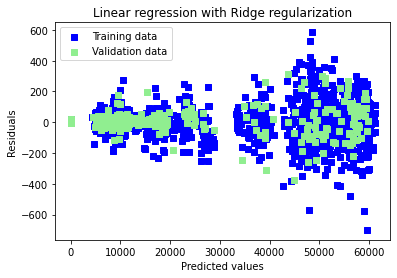

In [35]:
print("Ridge RMSE on Training set :", rmse_cv_train(ridge).mean())
print("Ridge RMSE on Test set :", rmse_cv_test(ridge).mean())
y_train_rdg = ridge.predict(X_train)
y_test_rdg = ridge.predict(X_test)

# Plot residuals
plt.scatter(y_train_rdg, y_train_rdg - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_rdg, y_test_rdg - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

In [ ]:
preds = ridge.predict(test_df)

df = pd.read_csv('SampleSubmission.csv')
df['close'] = preds
df.to_csv('Regression.csv', index = False)

In [792]:
fold_score = 0
t_pred = []

n = 8
kf = StratifiedKFold(n)
kf = KFold(n_splits=50, random_state=1, shuffle = True)
kf.get_n_splits(X)
  

for train_index, test_index in kf.split(X):
    # print("TRAIN:", train_index, "TEST:", test_index)
    Xtrain, Xtest = X.loc[train_index], X.loc[test_index]
    ytrain, ytest = y[train_index], y[test_index]

    model = Ridge(alpha=0.42)
    model.fit(Xtrain, ytrain)
    
    pred = model.predict(Xtest)
    score = np.sqrt(mean_squared_error(ytest, pred))
    fold_score = fold_score + (score/n)
    print(fold_score)
    
    predictions = model.predict(test_df)
    t_pred.append(predictions)

6.653496453473239
12.07740988571283
19.70994979376652
28.239031004088098
33.15741127272694
38.90595486027148
43.629398116694944
49.2546170295813
55.09928612339267
61.36121904273893
67.60497274595414
75.1283146150525
83.53976616982015
114.1610301205951
120.2533031341924
125.67693935945147
132.3480094287574
137.35879765715617
143.7254337806373
147.9757073785552
153.18592620204436
158.4530335886248
165.06973512981543
170.77387313153764
174.4110596072818
180.53866492721357
184.44540315209875
191.021231303218
195.9452089288682
201.77139033167225
207.2390006892074
212.39002434796026
218.36305260016678
222.6900796421517
228.03587214474612
233.52114162252778
238.34425890564458
245.19523005715007
251.8657242729377
258.19262761459396
263.43408785845384
269.0078791003161
275.24648982070073
279.7389851730415
284.5509200253108
289.62302775783166
293.81433688838774
300.2720832668114
304.85024376134965
310.5043794717706


In [49]:
df = pd.read_csv('SampleSubmission.csv')
df['close'] = np.mean(t_pred, axis = 0)
df.to_csv('CatA.csv', index = False)

In [ ]:
params = {'alpha': (np.logspace(-8, 8, 100))} # It will check from 1e-08 to 1e+08
ridge = Ridge(normalize=True)
ridge_model = GridSearchCV(ridge, params, cv = 10)
ridge_model.fit(X_train, y_train)
print(ridge_model.best_params_)
print(ridge_model.best_score_)

In [ ]:
model = Ridge(normalize=True, alpha=0.1, fit_intercept=True, solver='sparse_cg')

In [279]:
#fin_data.drop(['reddit_posts','reddit_posts_score','reddit_comments','reddit_comments_score',
              #'social_score','social_impact_score'], axis=1, inplace = True)

In [280]:
#fin_data.corr()

In [281]:
#from statsmodels.stats.outliers_influence import variance_inflation_factor
#from statsmodels.tools.tools import add_constant

In [282]:
""""
def vif_scores(df):
    VIF_Scores = pd.DataFrame()
    VIF_Scores["Independent Features"] = df.columns
    VIF_Scores["VIF Scores"] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    return VIF_Scores

df1 = fin_data.iloc[:,:-1]
vif_scores(df1)

"""

'"\ndef vif_scores(df):\n    VIF_Scores = pd.DataFrame()\n    VIF_Scores["Independent Features"] = df.columns\n    VIF_Scores["VIF Scores"] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]\n    return VIF_Scores\n\ndf1 = fin_data.iloc[:,:-1]\nvif_scores(df1)\n\n'

In [283]:
"""

lstt = ['open','high','low','volume','market_cap','tweets',
        'tweet_followers','tweet_sentiment_impact2','tweet_sentiment_impact4','price_score',
        'correlation_rank','galaxy_score','social_volume','market_cap_global']

for i in lstt:
    y,fitted = stats.boxcox(fin_data[i], lmbda = None)
    fin_data[i] = pd.DataFrame(y)

"""

"\n\nlstt = ['open','high','low','volume','market_cap','tweets',\n        'tweet_followers','tweet_sentiment_impact2','tweet_sentiment_impact4','price_score',\n        'correlation_rank','galaxy_score','social_volume','market_cap_global']\n\nfor i in lstt:\n    y,fitted = stats.boxcox(fin_data[i], lmbda = None)\n    fin_data[i] = pd.DataFrame(y)\n\n"

In [284]:
"""

lstt = df1.columns

for i in lstt:
    y = boxcox1p(fin_data[i], 0.1)
    fin_data[i] = pd.DataFrame(y)

"""

'\n\nlstt = df1.columns\n\nfor i in lstt:\n    y = boxcox1p(fin_data[i], 0.1)\n    fin_data[i] = pd.DataFrame(y)\n\n'

In [285]:
"""
numeric = fin_data.select_dtypes(include = 'number').columns
skew_features = fin_data[numeric].apply(lambda x: skew(x)).sort_values(ascending = False)

from pandas import DataFrame
high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index
print("There are {} numerical features with Skew > 0.5:".format(high_skew.shape[0]))
Skewness = pd.DataFrame({'Skew':high_skew})
Skewness.head(20)

"""

'\nnumeric = fin_data.select_dtypes(include = \'number\').columns\nskew_features = fin_data[numeric].apply(lambda x: skew(x)).sort_values(ascending = False)\n\nfrom pandas import DataFrame\nhigh_skew = skew_features[skew_features > 0.5]\nskew_index = high_skew.index\nprint("There are {} numerical features with Skew > 0.5:".format(high_skew.shape[0]))\nSkewness = pd.DataFrame({\'Skew\':high_skew})\nSkewness.head(20)\n\n'

In [286]:
"""
for i in Skewness.index.drop(['close']):
    fin_data[i] = np.log1p(fin_data[i])

"""

"\nfor i in Skewness.index.drop(['close']):\n    fin_data[i] = np.log1p(fin_data[i])\n\n"

In [308]:
fin_data['bet'] = fin_data['high']-fin_data['low']

In [309]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state=99)
split=ttrain.shape[0]
train_df=fin_data[:split]
test_df=fin_data[split:]

In [310]:
test_df.drop(['close'],axis=1, inplace = True)

C:\Users\Osuntoki\anaconda3\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [311]:
X =train_df.drop(['close'],axis=1)
y = train_df['close']

In [312]:
train_df.columns.shape

(51,)

In [313]:
main_cols.shape

(49,)

In [314]:
X.shape

(8617, 50)

In [315]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42)

In [316]:
from sklearn.linear_model import LinearRegression
# Instantiate model
lm2 = LinearRegression()
# Fit Model
lm2.fit(X_train, y_train)
# Predict
y_pred = lm2.predict(X_test)

In [317]:
# Make predictions in test set and prepare submission file
main_cols = test_df.columns.difference(['close'])
predictions = lm2.predict(test_df)

ss = pd.read_csv('SampleSubmission.csv')
sub_file = ss.copy()
sub_file.close = predictions
sub_file.to_csv('Basel.csv', index = False)

In [318]:
sub_file.head()

,id,close
0,ID_323Sn2,10.980851
1,ID_325SNW,11362.411806
2,ID_325uzE,6305.486499
3,ID_328qCx,14.479953
4,ID_3293uJ,13.796394


In [886]:
import lightgbm as lgb
import warnings

from scipy.stats import sem
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

from catboost import CatBoostRegressor

In [887]:
X = train_df.drop(['close'],axis =1)
y = train_df['close']
train_labels = y

test_df = test_df.drop(['close'],axis =1)

In [888]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler =RobustScaler()


for i in X.columns:
    X[i] = pd.DataFrame(scaler.fit_transform(X[i].values.reshape(-1,1)))

In [889]:
param = {'num_leaves': 29, ## using 29 and 30
     'min_data_in_leaf': 50, 
     'objective':'regression',
     'max_depth': 18,
     'learning_rate': 0.06,
     "boosting": "gbdt",
     "feature_fraction": 0.2,
     "bagging_freq": 0,
     "bagging_fraction": 1.0 ,
     "bagging_seed": 4,
     "metric": 'rmse',
     "verbosity": 1,
     "verbose_eval": False
    }

In [890]:
import lightgbm as lgb
import time

features = [c for c in train_df.columns if c not in ['close']]
target = train_df['close']

folds = KFold(n_splits=10, shuffle=True, random_state=15)
oof_lgb = np.zeros(len(train_df))
predictions_lgb = np.zeros(len(test_df))
start = time.time()
feature_importance_df = pd.DataFrame()

for fold_, (trn_idx, val_idx) in enumerate(folds.split(train_df.values, target.values)):
    print("fold n°{}".format(fold_))
    trn_data = lgb.Dataset(train_df.iloc[trn_idx][features], label=target.iloc[trn_idx])
    val_data = lgb.Dataset(train_df.iloc[val_idx][features], label=target.iloc[val_idx])

    num_round = 50000
    clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=100, early_stopping_rounds = 500)
    oof_lgb[val_idx] = clf.predict(train_df.iloc[val_idx][features], num_iteration=clf.best_iteration)

    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = features
    fold_importance_df["importance"] = clf.feature_importance()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)

    predictions_lgb += clf.predict(test_df[features], num_iteration=clf.best_iteration) / folds.n_splits
oof_lgb[oof_lgb < 0] = 0
print("CV score: {:<8.5f}".format(mean_squared_error(oof_lgb, target)**0.5))


fold n°0
Training until validation scores don't improve for 500 rounds
[100]	training's rmse: 532.342	valid_1's rmse: 770.523
[200]	training's rmse: 330.228	valid_1's rmse: 630.245
[300]	training's rmse: 247.069	valid_1's rmse: 586.55
[400]	training's rmse: 199.495	valid_1's rmse: 568.121
[500]	training's rmse: 167.812	valid_1's rmse: 557.442
[600]	training's rmse: 144.983	valid_1's rmse: 551.767
[700]	training's rmse: 126.916	valid_1's rmse: 546.383
[800]	training's rmse: 112.59	valid_1's rmse: 542.696
[900]	training's rmse: 101.344	valid_1's rmse: 541.092
[1000]	training's rmse: 92.0147	valid_1's rmse: 539.579
[1100]	training's rmse: 83.7268	valid_1's rmse: 538.364
[1200]	training's rmse: 76.3261	valid_1's rmse: 537.886
[1300]	training's rmse: 70.0173	valid_1's rmse: 537.506
[1400]	training's rmse: 64.5075	valid_1's rmse: 537.349
[1500]	training's rmse: 59.6788	valid_1's rmse: 536.726
[1600]	training's rmse: 55.184	valid_1's rmse: 536.228
[1700]	training's rmse: 51.2886	valid_1's rms

[6500]	training's rmse: 4.59321	valid_1's rmse: 496.379
[6600]	training's rmse: 4.44006	valid_1's rmse: 496.383
[6700]	training's rmse: 4.29126	valid_1's rmse: 496.372
[6800]	training's rmse: 4.15204	valid_1's rmse: 496.352
[6900]	training's rmse: 4.01864	valid_1's rmse: 496.349
[7000]	training's rmse: 3.89911	valid_1's rmse: 496.334
[7100]	training's rmse: 3.78321	valid_1's rmse: 496.317
[7200]	training's rmse: 3.66099	valid_1's rmse: 496.31
[7300]	training's rmse: 3.55234	valid_1's rmse: 496.304
[7400]	training's rmse: 3.4443	valid_1's rmse: 496.31
[7500]	training's rmse: 3.347	valid_1's rmse: 496.296
[7600]	training's rmse: 3.26535	valid_1's rmse: 496.291
[7700]	training's rmse: 3.18118	valid_1's rmse: 496.28
[7800]	training's rmse: 3.10019	valid_1's rmse: 496.275
[7900]	training's rmse: 3.01933	valid_1's rmse: 496.264
[8000]	training's rmse: 2.94108	valid_1's rmse: 496.256
[8100]	training's rmse: 2.86609	valid_1's rmse: 496.248
[8200]	training's rmse: 2.7988	valid_1's rmse: 496.243

[21000]	training's rmse: 0.273771	valid_1's rmse: 495.948
[21100]	training's rmse: 0.268527	valid_1's rmse: 495.947
[21200]	training's rmse: 0.263959	valid_1's rmse: 495.946
[21300]	training's rmse: 0.259872	valid_1's rmse: 495.945
[21400]	training's rmse: 0.256145	valid_1's rmse: 495.945
[21500]	training's rmse: 0.252558	valid_1's rmse: 495.945
[21600]	training's rmse: 0.248419	valid_1's rmse: 495.944
[21700]	training's rmse: 0.244377	valid_1's rmse: 495.943
[21800]	training's rmse: 0.240749	valid_1's rmse: 495.943
[21900]	training's rmse: 0.237833	valid_1's rmse: 495.942
[22000]	training's rmse: 0.234809	valid_1's rmse: 495.942
[22100]	training's rmse: 0.230827	valid_1's rmse: 495.941
[22200]	training's rmse: 0.227836	valid_1's rmse: 495.941
[22300]	training's rmse: 0.225207	valid_1's rmse: 495.94
[22400]	training's rmse: 0.221539	valid_1's rmse: 495.94
[22500]	training's rmse: 0.219006	valid_1's rmse: 495.94
[22600]	training's rmse: 0.215621	valid_1's rmse: 495.939
[22700]	training'

[35200]	training's rmse: 0.0377035	valid_1's rmse: 495.912
[35300]	training's rmse: 0.0372037	valid_1's rmse: 495.912
[35400]	training's rmse: 0.0366386	valid_1's rmse: 495.912
[35500]	training's rmse: 0.0360988	valid_1's rmse: 495.912
[35600]	training's rmse: 0.0355105	valid_1's rmse: 495.912
[35700]	training's rmse: 0.0350209	valid_1's rmse: 495.912
[35800]	training's rmse: 0.0346249	valid_1's rmse: 495.912
[35900]	training's rmse: 0.0341538	valid_1's rmse: 495.912
[36000]	training's rmse: 0.0337258	valid_1's rmse: 495.912
[36100]	training's rmse: 0.0334276	valid_1's rmse: 495.912
[36200]	training's rmse: 0.0330868	valid_1's rmse: 495.912
[36300]	training's rmse: 0.0325539	valid_1's rmse: 495.912
[36400]	training's rmse: 0.0320964	valid_1's rmse: 495.912
[36500]	training's rmse: 0.0316972	valid_1's rmse: 495.912
[36600]	training's rmse: 0.0313059	valid_1's rmse: 495.912
[36700]	training's rmse: 0.0307503	valid_1's rmse: 495.912
[36800]	training's rmse: 0.0303447	valid_1's rmse: 495.9

[49300]	training's rmse: 0.00602934	valid_1's rmse: 495.91
[49400]	training's rmse: 0.00594432	valid_1's rmse: 495.91
[49500]	training's rmse: 0.00585775	valid_1's rmse: 495.91
[49600]	training's rmse: 0.00577921	valid_1's rmse: 495.91
[49700]	training's rmse: 0.00572203	valid_1's rmse: 495.91
[49800]	training's rmse: 0.0056337	valid_1's rmse: 495.91
[49900]	training's rmse: 0.00557523	valid_1's rmse: 495.91
[50000]	training's rmse: 0.00549941	valid_1's rmse: 495.91
Did not meet early stopping. Best iteration is:
[50000]	training's rmse: 0.00549941	valid_1's rmse: 495.91
fold n°2
Training until validation scores don't improve for 500 rounds
[100]	training's rmse: 534.033	valid_1's rmse: 785.954
[200]	training's rmse: 331.318	valid_1's rmse: 626.906
[300]	training's rmse: 248.734	valid_1's rmse: 579.736
[400]	training's rmse: 202.064	valid_1's rmse: 557.333
[500]	training's rmse: 170.457	valid_1's rmse: 547.302
[600]	training's rmse: 147.766	valid_1's rmse: 540.134
[700]	training's rmse

[5700]	training's rmse: 5.40626	valid_1's rmse: 553.948
[5800]	training's rmse: 5.15594	valid_1's rmse: 553.936
[5900]	training's rmse: 4.92402	valid_1's rmse: 553.931
[6000]	training's rmse: 4.7205	valid_1's rmse: 553.922
[6100]	training's rmse: 4.52936	valid_1's rmse: 553.914
[6200]	training's rmse: 4.33672	valid_1's rmse: 553.908
[6300]	training's rmse: 4.1633	valid_1's rmse: 553.907
[6400]	training's rmse: 3.99409	valid_1's rmse: 553.892
[6500]	training's rmse: 3.82903	valid_1's rmse: 553.888
[6600]	training's rmse: 3.68006	valid_1's rmse: 553.874
[6700]	training's rmse: 3.54307	valid_1's rmse: 553.87
[6800]	training's rmse: 3.40411	valid_1's rmse: 553.877
[6900]	training's rmse: 3.27365	valid_1's rmse: 553.873
[7000]	training's rmse: 3.15057	valid_1's rmse: 553.862
[7100]	training's rmse: 3.03351	valid_1's rmse: 553.86
[7200]	training's rmse: 2.92868	valid_1's rmse: 553.858
[7300]	training's rmse: 2.82927	valid_1's rmse: 553.854
[7400]	training's rmse: 2.72434	valid_1's rmse: 553.

[4300]	training's rmse: 10.7644	valid_1's rmse: 470.238
[4400]	training's rmse: 10.2297	valid_1's rmse: 470.227
[4500]	training's rmse: 9.6878	valid_1's rmse: 470.194
[4600]	training's rmse: 9.21536	valid_1's rmse: 470.204
[4700]	training's rmse: 8.72215	valid_1's rmse: 470.198
[4800]	training's rmse: 8.29537	valid_1's rmse: 470.175
[4900]	training's rmse: 7.89419	valid_1's rmse: 470.176
[5000]	training's rmse: 7.50823	valid_1's rmse: 470.157
[5100]	training's rmse: 7.14957	valid_1's rmse: 470.114
[5200]	training's rmse: 6.83679	valid_1's rmse: 470.127
[5300]	training's rmse: 6.52518	valid_1's rmse: 470.122
[5400]	training's rmse: 6.22718	valid_1's rmse: 470.123
[5500]	training's rmse: 5.95389	valid_1's rmse: 470.097
[5600]	training's rmse: 5.68618	valid_1's rmse: 470.091
[5700]	training's rmse: 5.4141	valid_1's rmse: 470.091
[5800]	training's rmse: 5.18046	valid_1's rmse: 470.078
[5900]	training's rmse: 4.96419	valid_1's rmse: 470.081
[6000]	training's rmse: 4.75462	valid_1's rmse: 47

[4500]	training's rmse: 10.1321	valid_1's rmse: 495.347
[4600]	training's rmse: 9.64902	valid_1's rmse: 495.278
[4700]	training's rmse: 9.2005	valid_1's rmse: 495.261
[4800]	training's rmse: 8.76357	valid_1's rmse: 495.238
[4900]	training's rmse: 8.38109	valid_1's rmse: 495.214
[5000]	training's rmse: 8.00507	valid_1's rmse: 495.19
[5100]	training's rmse: 7.65179	valid_1's rmse: 495.162
[5200]	training's rmse: 7.30304	valid_1's rmse: 495.147
[5300]	training's rmse: 6.96662	valid_1's rmse: 495.124
[5400]	training's rmse: 6.67669	valid_1's rmse: 495.112
[5500]	training's rmse: 6.38418	valid_1's rmse: 495.103
[5600]	training's rmse: 6.1294	valid_1's rmse: 495.097
[5700]	training's rmse: 5.86654	valid_1's rmse: 495.088
[5800]	training's rmse: 5.62772	valid_1's rmse: 495.079
[5900]	training's rmse: 5.39393	valid_1's rmse: 495.083
[6000]	training's rmse: 5.17517	valid_1's rmse: 495.064
[6100]	training's rmse: 4.96464	valid_1's rmse: 495.06
[6200]	training's rmse: 4.77431	valid_1's rmse: 495.

In [891]:
sub= ttest[["id"]]
sub['Target'] = predictions_lgb
sub.to_csv('postchallengeLt.csv', index = False)

C:\Users\Osuntoki\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
!python -m pip uninstall matplotlib


In [ ]:
!pip install matplotlib==3.1.3

In [78]:
import pandas_profiling

In [ ]:
fin_data.profile_report()

In [561]:
df = pd.read_csv('SampleSubmission.csv')
df['Target'] = np.mean(test_pred, axis = 0)
df.to_csv('CatC.csv', index = False)

In [658]:
sub

,id,Target
0,ID_323Sn2,8.668695
1,ID_325SNW,8.668695
2,ID_325uzE,8.668695
3,ID_328qCx,8.668695
4,ID_3293uJ,8.668695
...,...,...
6217,ID_zufSPk,8.668695
6218,ID_zuz9yf,8.668695
6219,ID_zvrMSX,8.668695
6220,ID_zy9Cfv,8.668695


In [ ]:
from catboost import CatBoostRegressor

model = CatBoostRegressor(random_state=44,
                                 thread_count=4,
                                 verbose=False,
                                 loss_function='RMSE',
                                 eval_metric='RMSE',
                                 od_type="Iter",
                                 early_stopping_rounds=500,
                                 iterations=10000,
                                 task_type="CPU")
model.fit(X,y, verbose=0)